# K-Means Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dts = pd.read_csv("Mall_Customers.csv")
x = dts.iloc[:, [3, 4]].values

## Using ELBOW METHOD to find optimal number of CLUSTERS

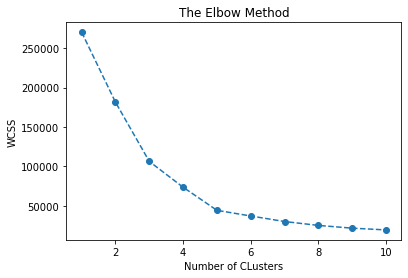

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state=42, init= 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, linestyle= '--', marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
#from the graph below we can that the optima lnumber of cluster is 5

## Training K-MEANS model on dataset

In [6]:
kmeans = KMeans(n_clusters = 5, random_state=42, init= 'k-means++')
y_kmeans = kmeans.fit_predict(x)

In [7]:
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [8]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


## Visualizing cluster 

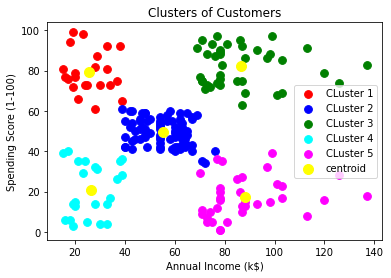

In [9]:
color_list = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_label = ['CLuster 1', 'CLuster 2', 'CLuster 3', 'CLuster 4', 'CLuster 5']
for i in range(0,5):
    plt.scatter(x[y_kmeans == i, 0], x[y_kmeans == i, 1], c = color_list[i], label = cluster_label[i], s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'yellow', label = 'centroid' ,s= 100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## K-Means Clustering with all variables

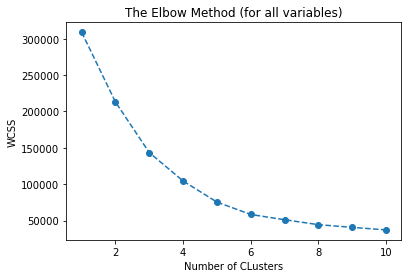

In [10]:
X2 = dts.iloc[:, 1:].values
# encoding Categorical DAta
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X2[:, 0] = le.fit_transform(X2[:, 0])

#Visualizing WCSS plot for optimal number of clusters
from sklearn.cluster import KMeans
wcss_2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i, random_state=42, init= 'k-means++')
    kmeans2.fit(X2)
    wcss_2.append(kmeans2.inertia_)
plt.plot(range(1,11), wcss_2, linestyle= '--', marker = 'o')
plt.title('The Elbow Method (for all variables)')
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

## Training New model with all variables

In [11]:
kmeans2 = KMeans(n_clusters = 5, random_state=42, init= 'k-means++')
y_kmeans_2 = kmeans2.fit_predict(X2)


In [12]:
print(y_kmeans_2)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [13]:
kmeans2.cluster_centers_

array([[ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])

## Visulaizing Cluster Plot with all Variables

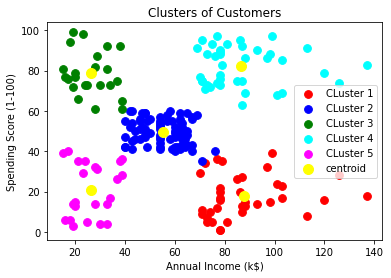

In [14]:
color_list = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_label = ['CLuster 1', 'CLuster 2', 'CLuster 3', 'CLuster 4', 'CLuster 5']
for i in range(0,5):
    plt.scatter(x[y_kmeans_2 == i, 0], x[y_kmeans_2 == i, 1], c = color_list[i], label = cluster_label[i], s = 60)
plt.scatter(kmeans2.cluster_centers_[:, 2], kmeans2.cluster_centers_[:, 3], c = 'yellow', label = 'centroid' ,s= 100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()